# Transient Analysis 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [8]:
csv_file_path = 'results/capacitance_simulation_results.csv'
df1 = pd.read_csv(csv_file_path)

In [9]:
capacitor_values = df1['C(nF)'].unique()
print(capacitor_values)

[1.000e-02 5.100e-01 1.010e+00 1.510e+00 2.010e+00 2.510e+00 3.010e+00
 3.510e+00 4.010e+00 4.510e+00 5.010e+00 5.510e+00 6.010e+00 6.510e+00
 7.010e+00 7.510e+00 8.010e+00 8.510e+00 9.010e+00 9.510e+00 1.001e+01]


In [10]:
df1.head()

,C(nF),Time (ms),Vout (mV),Input (mV)
0,0.01,0.000000e+00,129.625931,1000.0
1,0.01,1.000000e-08,129.625931,1000.0
2,0.01,2.000000e-08,129.625931,1000.0
3,0.01,4.000000e-08,129.625931,1000.0
4,0.01,8.000000e-08,129.625931,1000.0


In [11]:
df1.tail()

,C(nF),Time (ms),Vout (mV),Input (mV)
711573,10.01,4.999568,465.391666,1000.0
711574,10.01,4.999775,465.382457,1000.0
711575,10.01,4.999992,465.372473,1000.0
711576,10.01,4.999999,465.372175,1000.0
711577,10.01,5.000000,465.372115,1000.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711578 entries, 0 to 711577
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   C(nF)       711578 non-null  float64
 1   Time (ms)   711578 non-null  float64
 2   Vout (mV)   711578 non-null  float64
 3   Input (mV)  711578 non-null  float64
dtypes: float64(4)
memory usage: 21.7 MB


In [13]:
df2 = pd.read_csv("results/comprehensive_analysis_C1.csv")

In [14]:
df2

,Capacitance (C1) [nF],Peak Voltage [mV],Min Voltage [mV],Ripple Voltage [mV],Settling Time (ms)
0,0.01,471.293241,129.625931,341.667295,0.041319
1,0.51,468.891829,129.625931,339.265883,0.233319
2,1.01,468.678981,129.625931,339.053035,0.425319
3,1.51,468.599409,129.625931,338.973463,0.617319
4,2.01,468.557775,129.625931,338.931859,0.809439
5,2.51,468.532175,129.625931,338.906229,1.001752
6,3.01,468.514770,129.625931,338.888824,1.197319
7,3.51,468.501866,129.625931,338.875949,1.389319
8,4.01,468.490452,129.625931,338.864505,1.581319
9,4.51,468.476564,129.625931,338.850617,1.773319


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Capacitance (C1) [nF]  21 non-null     float64
 1   Peak Voltage [mV]      21 non-null     float64
 2   Min Voltage [mV]       21 non-null     float64
 3   Ripple Voltage [mV]    21 non-null     float64
 4   Settling Time (ms)     21 non-null     float64
dtypes: float64(5)
memory usage: 972.0 bytes


In [16]:
df2.describe()

,Capacitance (C1) [nF],Peak Voltage [mV],Min Voltage [mV],Ripple Voltage [mV],Settling Time (ms)
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,5.010000,468.121983,129.625931,338.496049,1.918935
std,3.102418,1.179468,0.000000,1.179462,1.131082
min,0.010000,465.437531,129.625931,335.811615,0.041319
25%,2.510000,467.832536,129.625931,338.206589,1.001752
50%,5.010000,468.453944,129.625931,338.828027,1.965315
75%,7.510000,468.532175,129.625931,338.906229,2.881319
max,10.010000,471.293241,129.625931,341.667295,3.577315


The table presents statistical data on the performance of a 2:1 switched capacitor DC-DC converter with varying load capacitance. Key insights include:

1. **Peak Voltage**: The average peak voltage is 468.12 mV, with a slight variation (std = 1.18 mV) across the capacitance range, peaking at 471.29 mV and dropping to 465.44 mV.
  
2. **Ripple Voltage**: The ripple voltage is consistent with a mean of 338.50 mV, showing minimal fluctuation (std = 1.18 mV). It ranges from 335.81 mV to 341.67 mV, indicating stable performance.

3. **Settling Time**: Settling time averages around 1.92 ms, with a significant increase as capacitance rises. The max settling time is 3.58 ms, highlighting the slower stabilization for larger capacitance values.

These results suggest that as capacitance increases, the system maintains steady performance with minimal ripple, but settling time becomes longer.

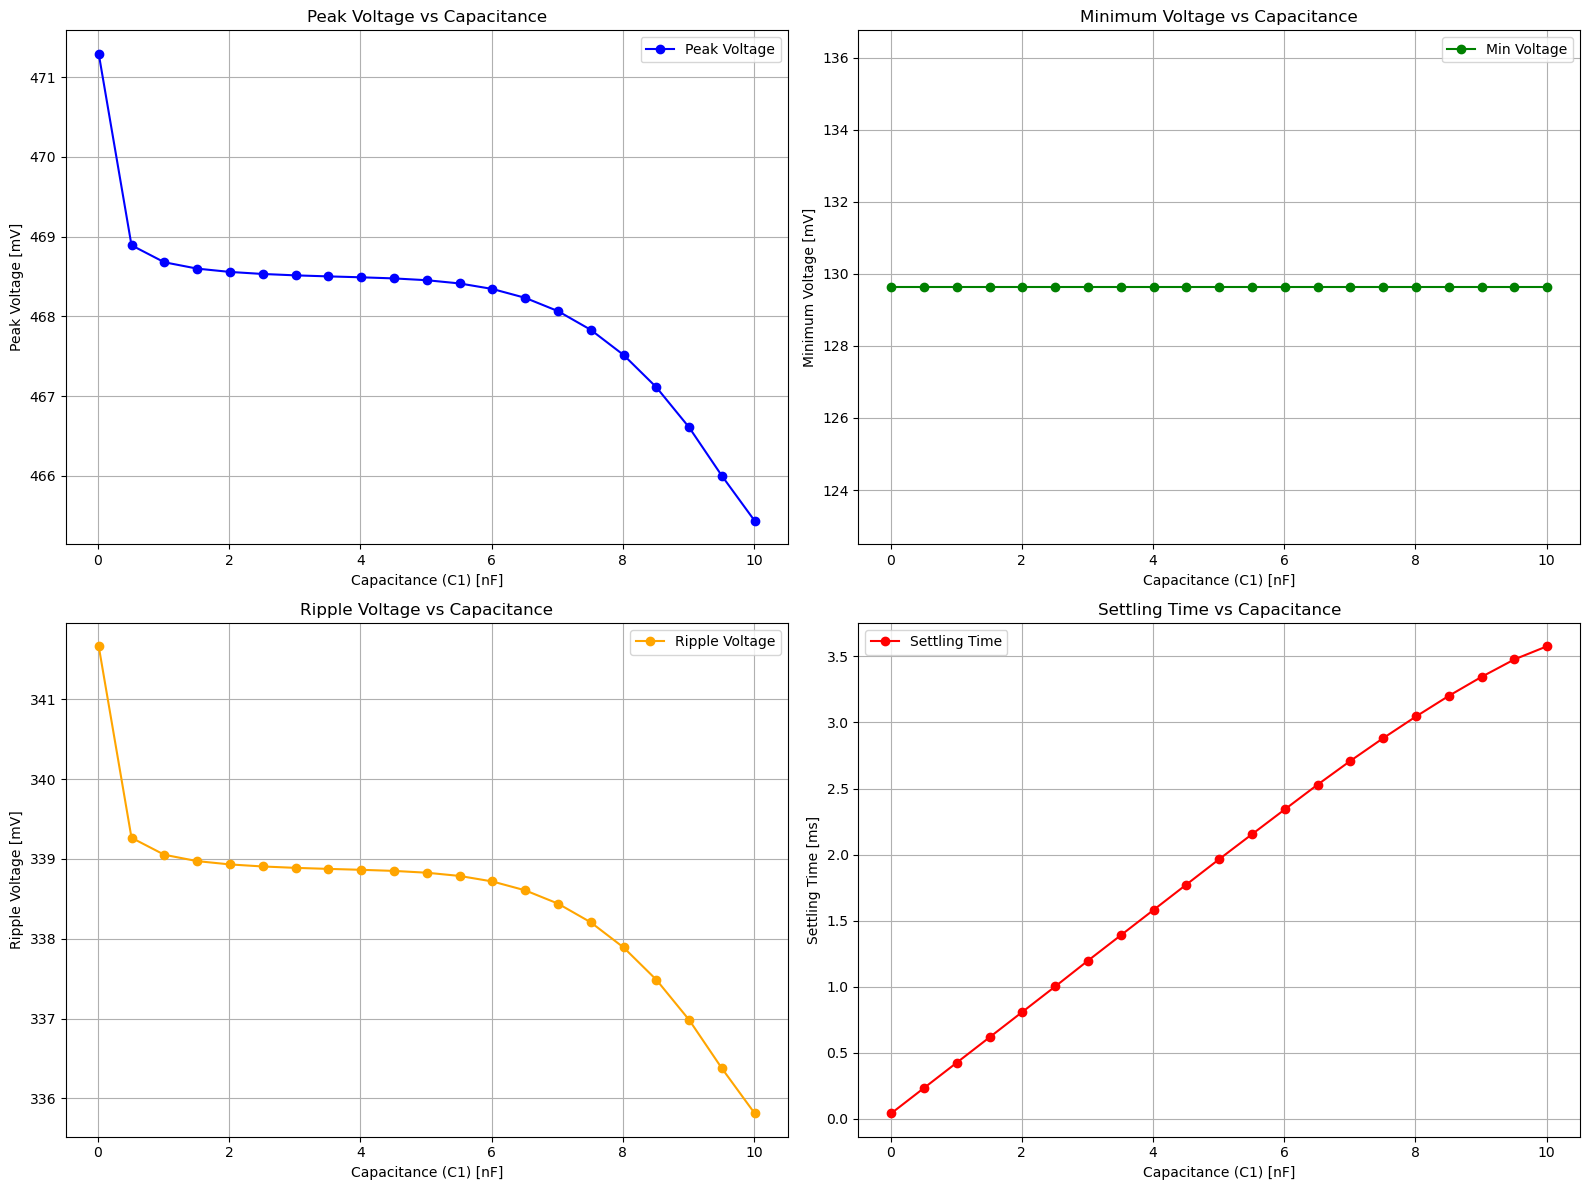

In [17]:

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Peak Voltage [mV]'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Peak Voltage [mV]')
plt.title('Peak Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Min Voltage [mV]'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Minimum Voltage [mV]')
plt.title('Minimum Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Ripple Voltage [mV]'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Ripple Voltage [mV]')
plt.title('Ripple Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Settling Time [ms]')
plt.title('Settling Time vs Capacitance')
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()


Based on the transient analysis results of varying load capacitance for a 2:1 switched capacitor DC-DC converter with a frequency of 250 kHz and switch capacitance of 10 pF, the following insights were observed:

1. **Peak Voltage**: The peak voltage was found to slightly decrease as the load capacitance increased. Starting from 471.29 mV at 0.01 nF, it gradually reduced to 465.44 mV at 10.01 nF. This indicates that the system's ability to maintain a high voltage diminishes with larger capacitance, suggesting that increasing load capacitance has a minor effect on the converter’s voltage regulation.

2. **Ripple Voltage**: The ripple voltage showed a marginal decrease from 341.67 mV to 335.81 mV as the load capacitance increased. This implies that larger load capacitances help in smoothing the voltage output more effectively, thereby reducing voltage fluctuations.

3. **Settling Time**: An increase in settling time was observed with an increase in load capacitance. Settling time started at 0.041 ms for 0.01 nF and rose to 3.577 ms for 10.01 nF. This suggests that larger capacitances result in slower stabilization times after transient events, likely due to the increased time required for the larger capacitors to charge/discharge.

### Key Insights:
- **Larger Load Capacitance**: As the load capacitance increases, the peak voltage slightly reduces, ripple voltage decreases, and settling time increases. This reveals a trade-off where increasing capacitance improves voltage stability (reduced ripple) but results in slower transient responses (longer settling time).
- **Optimization**: The challenge lies in balancing load capacitance to minimize ripple and settling time while maintaining the peak voltage within the desired range.

These insights provide a framework for optimizing load capacitance in DC-DC converter systems to achieve the desired performance.

In [18]:

csv_file_path = 'results/frequency_sweep_simulation_results.csv'
df3 = pd.read_csv(csv_file_path)
sweep_frequency = df3['Frequency (KHz)'].unique()
print(sweep_frequency)


[  20   70  120  170  220  270  320  370  420  470  520  570  620  670
  720  770  820  870  920  970 1020]


In [19]:
df3.head()

,Frequency (KHz),Time (ms),Vout (mV),Input (mV)
0,20,0.000000e+00,129.625931,1000.0
1,20,1.000000e-08,129.625931,1000.0
2,20,2.000000e-08,129.625931,1000.0
3,20,4.000000e-08,129.625931,1000.0
4,20,8.000000e-08,129.625931,1000.0


In [20]:
df3.tail()

,Frequency (KHz),Time (ms),Vout (mV),Input (mV)
1108417,1020,4.999666,477.121234,1000.0
1108418,1020,4.999845,476.964772,1000.0
1108419,1020,4.999988,476.828814,1000.0
1108420,1020,4.999999,476.818085,1000.0
1108421,1020,5.000000,476.817101,1000.0


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108422 entries, 0 to 1108421
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Frequency (KHz)  1108422 non-null  int64  
 1   Time (ms)        1108422 non-null  float64
 2   Vout (mV)        1108422 non-null  float64
 3   Input (mV)       1108422 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 33.8 MB


In [22]:
file_path = "results/comprehensive_analysis_F_Osc.csv"
df4 = pd.read_csv(file_path)

In [23]:
df4

,Frequency (KHz),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
0,20,412.795156,129.625931,283.169210,1.076313
1,70,441.489249,129.625931,311.863303,0.407227
2,120,454.580098,129.625931,324.954152,0.277577
3,170,462.220728,129.625931,332.594812,0.226554
4,220,466.986001,129.625931,337.360084,0.201964
5,270,469.984829,129.625931,340.358913,0.190093
6,320,471.902013,129.625931,342.276096,0.179658
7,370,473.260134,129.625931,343.634188,0.174184
8,420,474.242508,129.625931,344.616592,0.170239
9,470,474.975288,129.625931,345.349371,0.168756


In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Frequency (KHz)      21 non-null     int64  
 1   Peak Voltage (mV)    21 non-null     float64
 2   Min Voltage (mV)     21 non-null     float64
 3   Ripple Voltage (mV)  21 non-null     float64
 4   Settling Time (ms)   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 972.0 bytes


In [25]:
df4.describe()

,Frequency (KHz),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,520.000000,468.821731,129.625931,339.195799,0.230994
std,310.241841,15.661992,0.000000,15.661996,0.202073
min,20.000000,412.795156,129.625931,283.169210,0.159279
25%,270.000000,469.984829,129.625931,340.358913,0.161576
50%,520.000000,475.483775,129.625931,345.857859,0.166056
75%,770.000000,476.771981,129.625931,347.146034,0.190093
max,1020.000000,477.253973,129.625931,347.628057,1.076313


The table provides a summary of the transient analysis of the 2:1 switched capacitor DC-DC converter for varying clock frequencies, with load capacitance = 0.5nF and switch capacitance = 10pF. The data provides insights into key parameters: peak voltage, minimum voltage, ripple voltage, and settling time. Below are the key observations:

1. **Peak Voltage**:
   - The peak voltage ranges from 412.80 mV (at 20 kHz) to 477.25 mV (at 1020 kHz).
   - The mean peak voltage is 468.82 mV, with a standard deviation of 15.66 mV, indicating a fairly consistent peak voltage across the varying frequencies.

2. **Min Voltage**:
   - The minimum voltage remains constant at 129.63 mV across all frequencies.
   - This suggests that the minimum voltage is well-regulated and not affected by frequency variations.

3. **Ripple Voltage**:
   - The ripple voltage ranges from 283.17 mV (at 20 kHz) to 347.63 mV (at 1020 kHz).
   - The mean ripple voltage is 339.20 mV, with a standard deviation of 15.66 mV, indicating a relatively consistent fluctuation in the output voltage across frequencies.

4. **Settling Time**:
   - The settling time ranges from 0.16 ms (at 1020 kHz) to 1.08 ms (at 20 kHz).
   - The mean settling time is 0.23 ms, with a standard deviation of 0.20 ms, indicating that higher frequencies lead to faster stabilization of the output voltage.

### Key Insights:
- **Peak Voltage and Ripple Voltage**: As the frequency increases, the peak voltage increases, and ripple voltage also rises. The increase in ripple voltage with higher frequency may indicate a trade-off between achieving higher peak voltage and maintaining stable voltage with minimal fluctuations.
- **Settling Time**: Higher frequencies lead to faster settling times, with the system stabilizing faster at 1020 kHz (0.16 ms). This shows the benefit of higher frequencies in improving the transient response.
- **Optimization of Parameters**: The optimal frequency for the system depends on balancing the need for higher peak voltage, lower ripple voltage, and faster settling times.

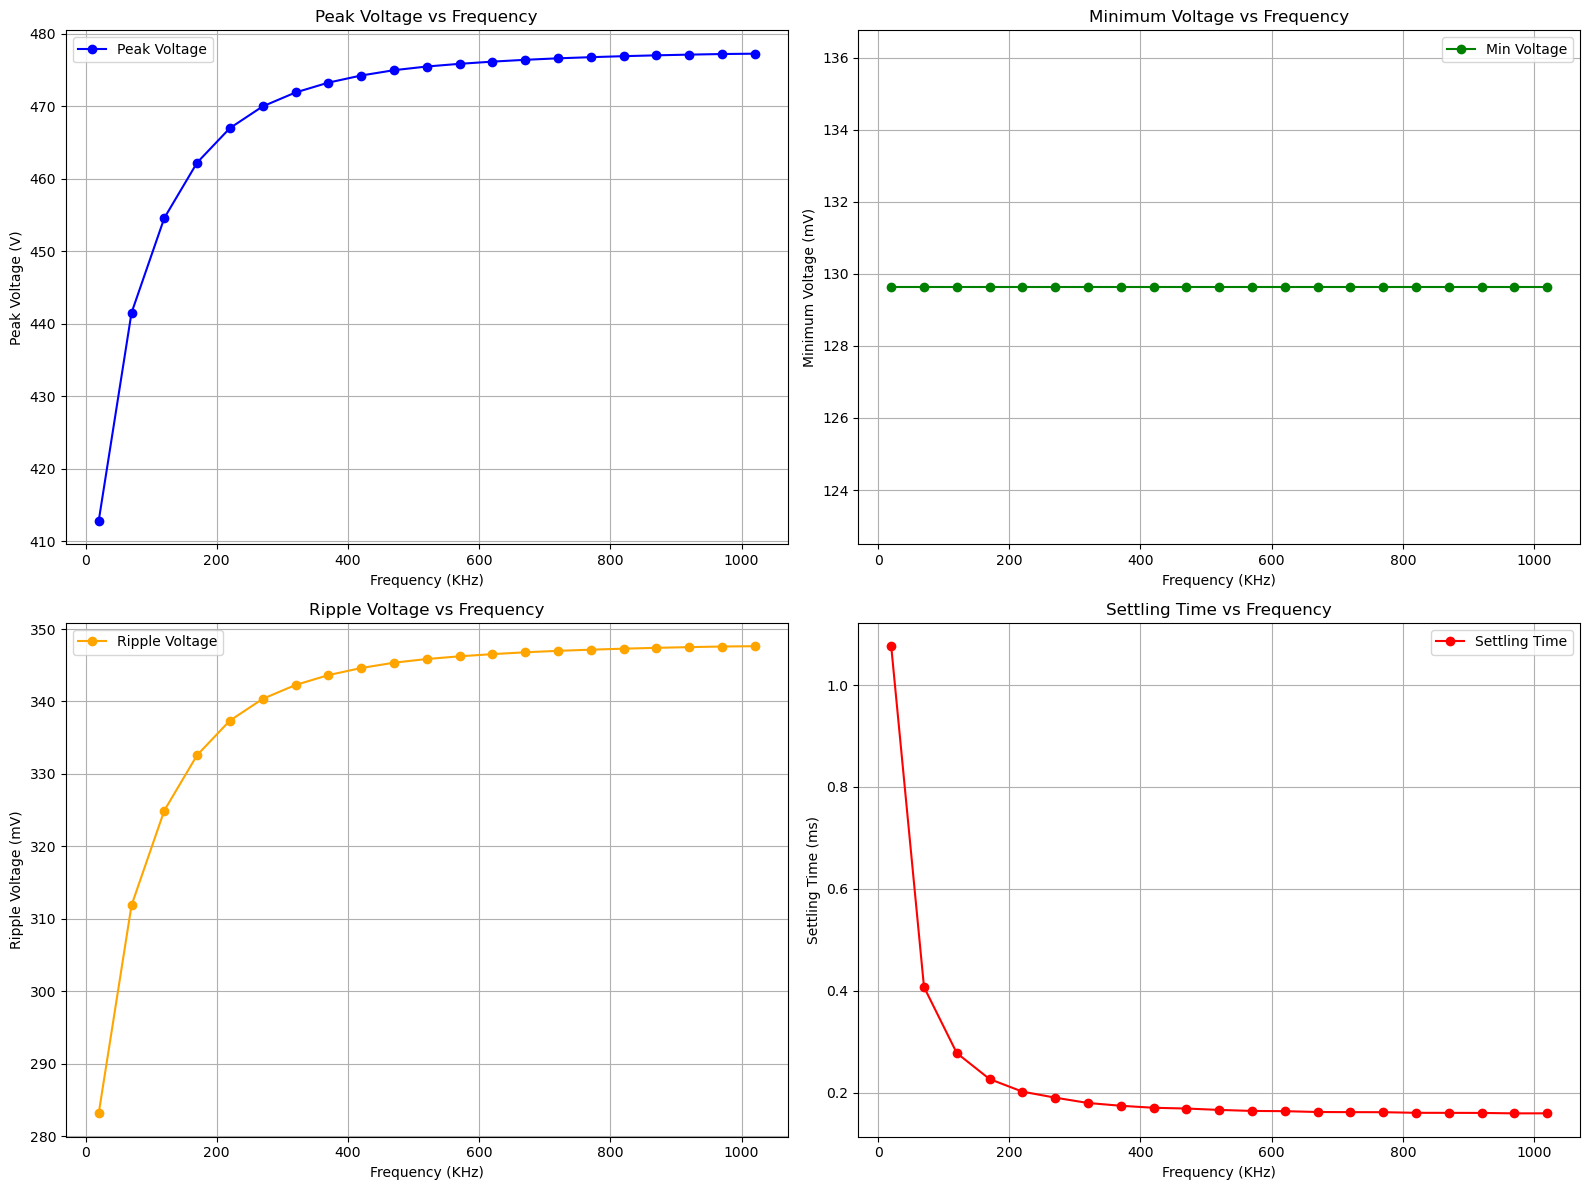

In [26]:

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
plt.plot(df4['Frequency (KHz)'], df4['Peak Voltage (mV)'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Peak Voltage (V)')
plt.title('Peak Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(df4['Frequency (KHz)'], df4['Min Voltage (mV)'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Minimum Voltage (mV)')
plt.title('Minimum Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(df4['Frequency (KHz)'], df4['Ripple Voltage (mV)'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Ripple Voltage (mV)')
plt.title('Ripple Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(df4['Frequency (KHz)'], df4['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Settling Time (ms)')
plt.title('Settling Time vs Frequency')
plt.grid(True)
plt.legend()


plt.tight_layout()


plt.show()  

The Graph provides insights into the transient analysis of a 2:1 switched capacitor DC-DC converter with varying clock frequencies, while maintaining a load capacitance of 0.5nF and switch capacitance of 10pF. Key observations include:

1. **Peak Voltage**: The peak voltage increases with clock frequency, starting from 412.80 mV at 20 kHz to 477.25 mV at 1020 kHz. This suggests that higher clock frequencies lead to a higher peak voltage, indicating improved voltage regulation as the frequency increases.

2. **Ripple Voltage**: The ripple voltage also increases with frequency, from 283.17 mV at 20 kHz to 347.63 mV at 1020 kHz. This indicates that higher frequencies may increase the fluctuation in the output voltage, potentially affecting the stability of the converter.

3. **Settling Time**: The settling time decreases significantly as the clock frequency increases. Starting at 1.08 ms at 20 kHz, it drops to 0.16 ms at 1020 kHz. This shows that higher clock frequencies allow the system to reach a stable state faster after a transient event, improving transient response.

### Key Insights:
- **Increasing Clock Frequency**: As the clock frequency increases, the peak voltage rises, but ripple voltage also increases. However, the settling time improves, suggesting that higher frequencies provide faster stabilization, but with trade-offs in ripple control.
- **Optimization Consideration**: To balance between faster settling times and acceptable ripple levels, selecting an optimal clock frequency is crucial based on the specific requirements of the application.

In [27]:
csv_file_path = 'results/load_simulation_results.csv'
df5 = pd.read_csv(csv_file_path)
load_resistances = df5['R(kΩ)'].unique()
print(sweep_frequency)

[  20   70  120  170  220  270  320  370  420  470  520  570  620  670
  720  770  820  870  920  970 1020]


In [28]:
df5.head()

,R(kΩ),Time (ms),Vout (mV),Input (mV)
0,10,0.000000e+00,0.000040,1000.0
1,10,1.000000e-08,0.000040,1000.0
2,10,2.000000e-08,0.000040,1000.0
3,10,4.000000e-08,0.000041,1000.0
4,10,8.000000e-08,0.000047,1000.0


In [29]:
df5.tail()

,R(kΩ),Time (ms),Vout (mV),Input (mV)
789995,1010,4.999568,424.007684,1000.0
789996,1010,4.999751,423.840463,1000.0
789997,1010,4.999902,423.693836,1000.0
789998,1010,4.999999,423.596859,1000.0
789999,1010,5.000000,423.595846,1000.0


In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790000 entries, 0 to 789999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   R(kΩ)       790000 non-null  int64  
 1   Time (ms)   790000 non-null  float64
 2   Vout (mV)   790000 non-null  float64
 3   Input (mV)  790000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 24.1 MB


In [31]:
df5.describe()

,R(kΩ),Time (ms),Vout (mV),Input (mV)
count,790000.000000,790000.000000,790000.000000,790000.0
mean,503.994620,2.494954,340.546938,1000.0
std,303.730453,1.446203,102.135097,0.0
min,10.000000,0.000000,0.000040,1000.0
25%,260.000000,1.242001,304.170430,1000.0
50%,510.000000,2.494657,379.987448,1000.0
75%,760.000000,3.747771,411.433965,1000.0
max,1010.000000,5.000000,424.682140,1000.0


In [32]:
file_path = "results/comprehensive_analysis_R1.csv"
df6 = pd.read_csv(file_path)

In [33]:
df6

,Resistance (KΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
0,10,35.677657,0.000040,35.677616,0.018657
1,60,155.894190,0.000241,155.893952,0.082773
2,110,226.513609,0.000442,226.513162,0.118657
3,160,272.395521,0.000643,272.394866,0.140624
4,210,304.479808,0.000844,304.478973,0.156656
5,260,328.108758,0.001045,328.107715,0.168829
6,310,345.800072,0.001246,345.798820,0.173266
7,360,359.796762,0.001447,359.795302,0.180952
8,410,370.937586,0.001648,370.935947,0.184656
9,460,379.988909,0.001849,379.987061,0.188656


In [34]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Resistance (KΩ)      21 non-null     int64  
 1   Peak Voltage (mV)    21 non-null     float64
 2   Min Voltage (mV)     21 non-null     float64
 3   Ripple Voltage (mV)  21 non-null     float64
 4   Settling Time (ms)   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 972.0 bytes


In [35]:
df6.describe()

,Resistance (KΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,510.000000,346.977617,0.002048,346.975567,0.170805
std,310.241841,100.570891,0.001244,100.569853,0.046572
min,10.000000,35.677657,0.000040,35.677616,0.018657
25%,260.000000,328.108758,0.001045,328.107715,0.168829
50%,510.000000,387.575150,0.002050,387.573093,0.190657
75%,760.000000,411.944717,0.003055,411.941648,0.197315
max,1010.000000,424.682140,0.004020,424.678117,0.201315


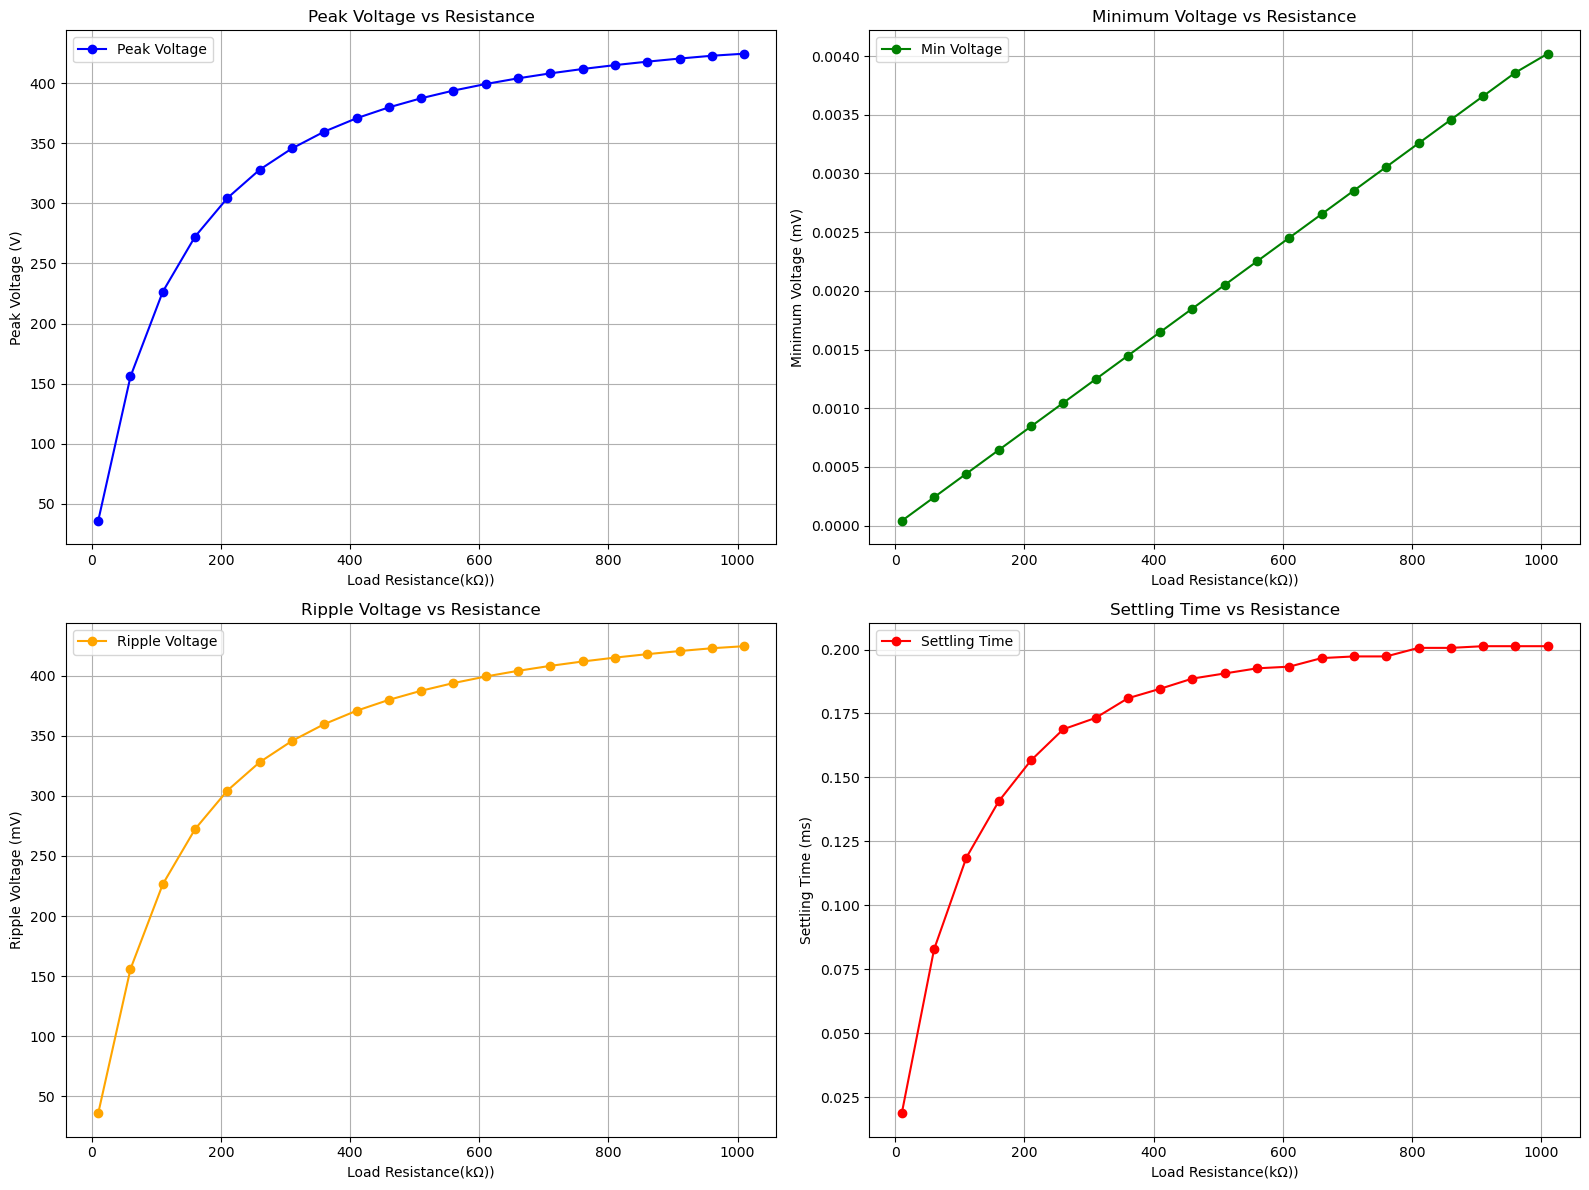

In [36]:

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(df6['Resistance (KΩ)'], df6['Peak Voltage (mV)'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Peak Voltage (V)')
plt.title('Peak Voltage vs Resistance')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(df6['Resistance (KΩ)'], df6['Min Voltage (mV)'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Minimum Voltage (mV)')
plt.title('Minimum Voltage vs Resistance')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(df6['Resistance (KΩ)'], df6['Ripple Voltage (mV)'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Ripple Voltage (mV)')
plt.title('Ripple Voltage vs Resistance')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(df6['Resistance (KΩ)'], df6['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Settling Time (ms)')
plt.title('Settling Time vs Resistance')
plt.grid(True)
plt.legend()


plt.tight_layout()


plt.show()  

The Graph shows the relationship between load resistance (ranging from 10 KΩ to 1010 KΩ) and the performance parameters (Peak Voltage, Min Voltage, Ripple Voltage, and Settling Time) at a fixed frequency of 250 kHz, with C_Load = 0.5 nF and C_Switch = 10 pF. Here are the key insights:

1. **Peak Voltage**: 
   - Increases with resistance, from 35.68 mV at 10 KΩ to 424.68 mV at 1010 KΩ.
   - This suggests that as the load resistance increases, the peak voltage output rises.

2. **Min Voltage**:
   - Increases slightly with resistance, but the values remain very small (close to 0).
   - This indicates that the system maintains a low minimum voltage across varying load resistances.

3. **Ripple Voltage**:
   - Increases with resistance, from 35.68 mV at 10 KΩ to 424.68 mV at 1010 KΩ.
   - Ripple voltage is higher at higher resistance, which implies that higher load resistance contributes to greater variations in voltage.

4. **Settling Time**:
   - Slightly increases with resistance, starting at 0.0187 ms at 10 KΩ and rising to 0.2013 ms at 1010 KΩ.
   - The longer settling time at higher resistance suggests that the system requires more time to stabilize as the load resistance increases.

### Key Insights:
- As resistance increases, both peak voltage and ripple voltage increase, while settling time also rises slightly.
- The system behaves with higher voltages and slightly increased instability (due to higher ripple) at higher resistances.
